# Real Estate - Price Predictor

In [1]:
import pandas as pd
import numpy as np

In [2]:
housing= pd.read_csv("housing_data.csv")

housing=housing.drop(['No'],axis=1)
housing.columns=['trans_date','age','station_dist','stores','latitude','longitude','price']

In [3]:
housing.head()

,trans_date,age,station_dist,stores,latitude,longitude,price
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   trans_date    414 non-null    float64
 1   age           414 non-null    float64
 2   station_dist  414 non-null    float64
 3   stores        414 non-null    int64  
 4   latitude      414 non-null    float64
 5   longitude     414 non-null    float64
 6   price         414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [5]:
housing.describe()

,trans_date,age,station_dist,stores,latitude,longitude,price
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


# Histogram Plot

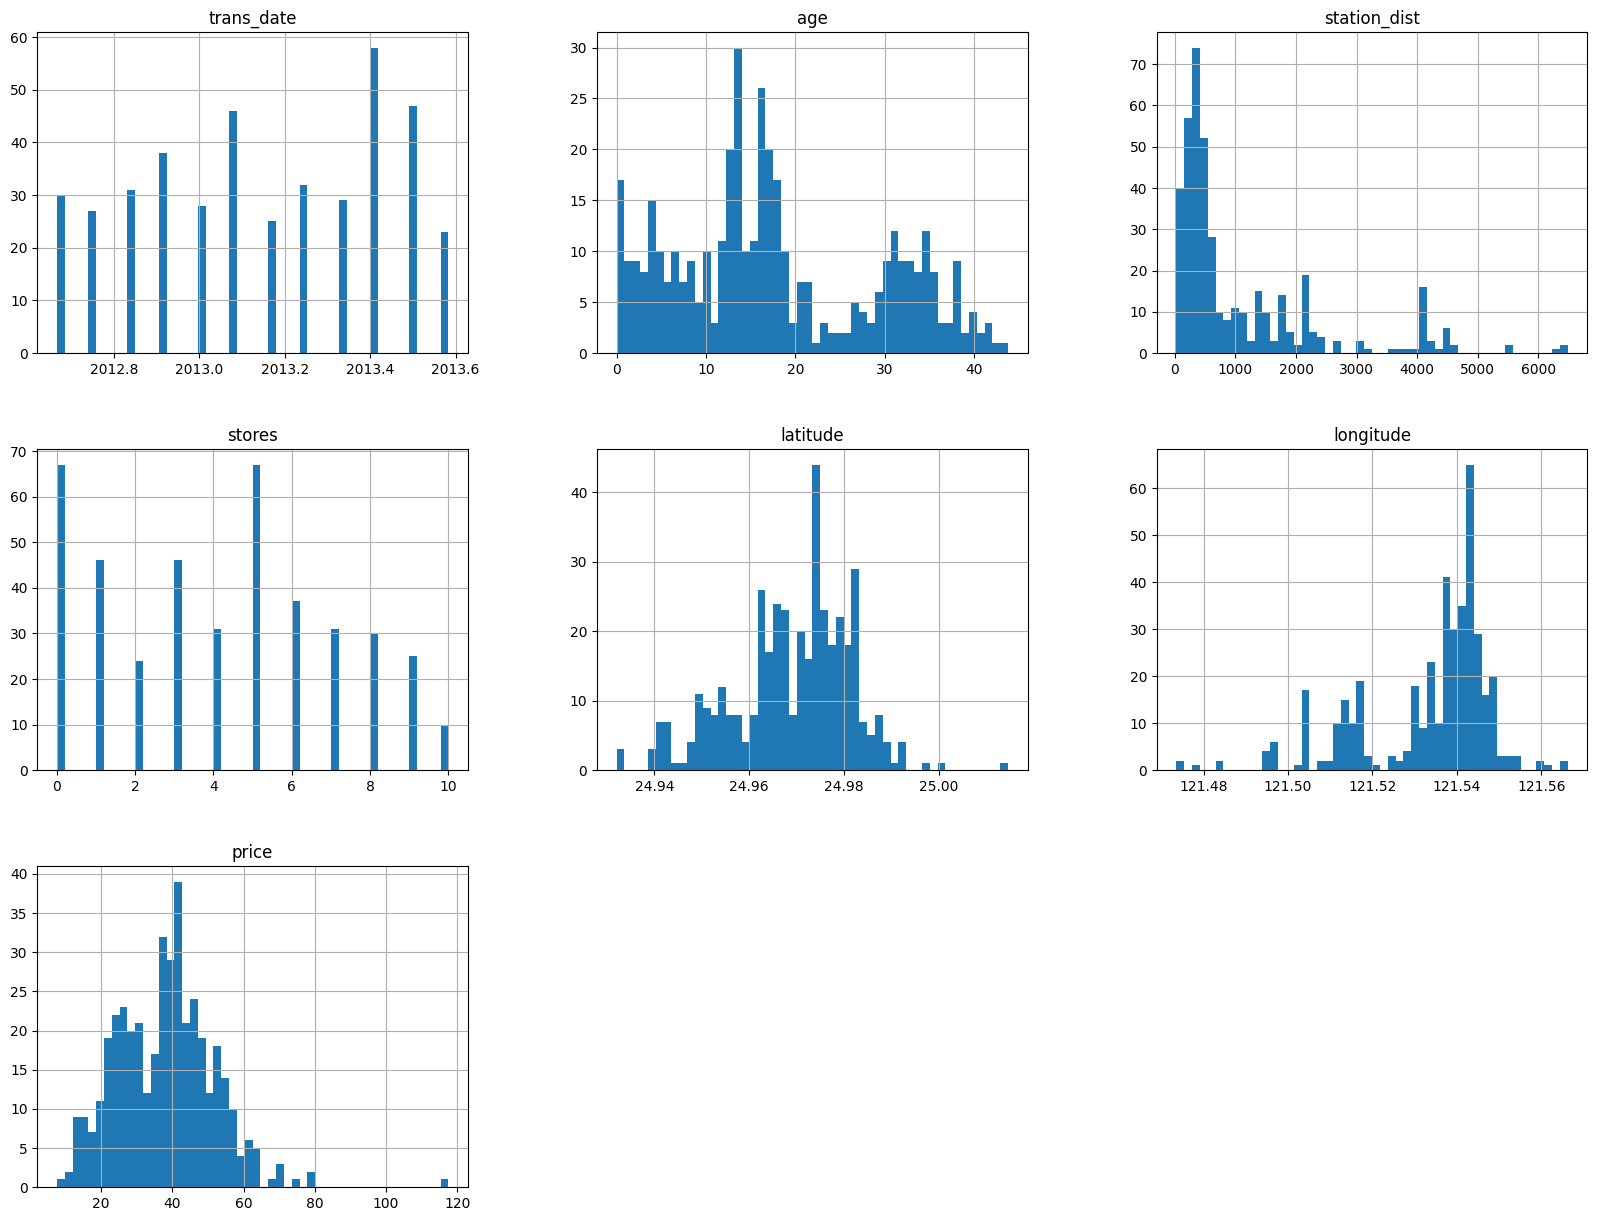

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))
plt.show()

# Train-Test Splitting

In [7]:
# def split_train_test(data,test_ratio,random_state):
#     np.random.seed(random_state)
#     shuffled=np.random.permutation(len(data))
#     test_set_size=int(len(data)*test_ratio)
#     test_indices=shuffled[:test_set_size]
#     train_indices=shuffled[test_set_size:]
    
#     return data.iloc[train_indices],data.iloc[test_indices]

In [8]:
# train_set,test_set=split_train_test(housing,0.2,42)

In [9]:
# print(f'Rows in train set : {len(train_set)}\nRows in test set : {len(test_set)}')

In [10]:
from sklearn.model_selection import train_test_split

train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)
print(f'Rows in train set : {len(train_set)}\nRows in test set : {len(test_set)}')

Rows in train set : 331
Rows in test set : 83


In [11]:
housing=train_set.copy()

# Looking for Correlations

In [12]:
corr_matrix=housing.corr()
corr_matrix['price'].sort_values(ascending=False)

price           1.000000
stores          0.554251
latitude        0.531052
longitude       0.495413
trans_date      0.074785
age            -0.214238
station_dist   -0.657009
Name: price, dtype: float64

<Axes: xlabel='station_dist', ylabel='price'>

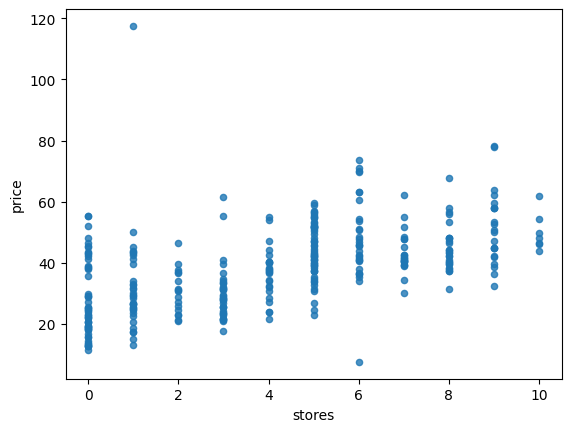

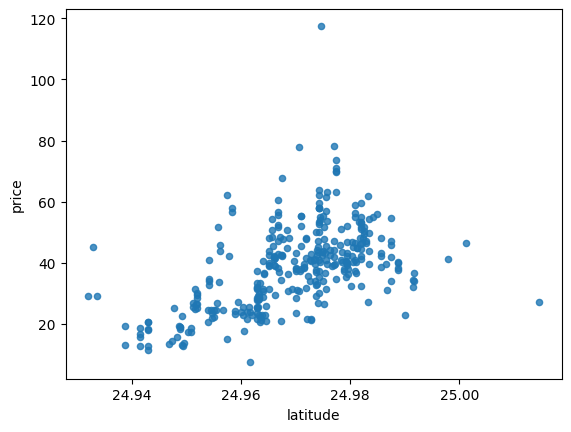

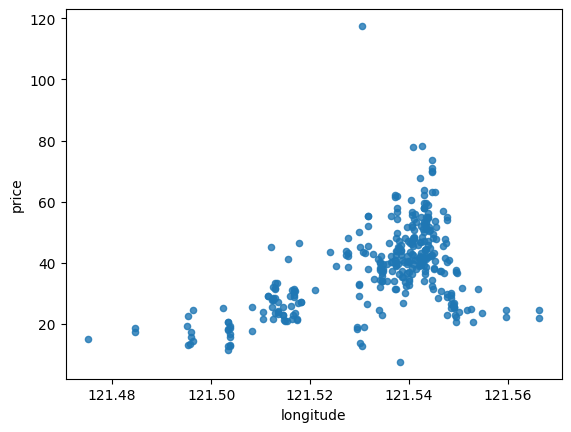

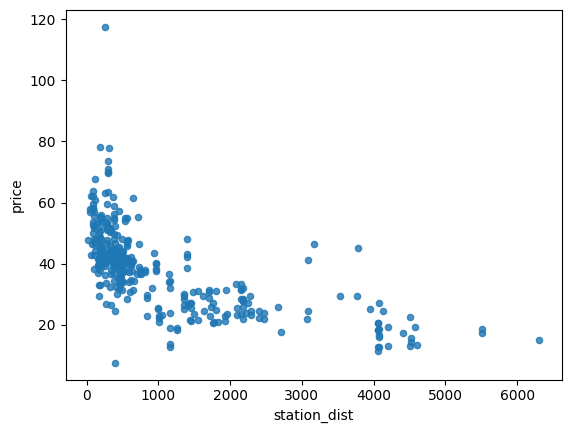

In [13]:
housing.plot(kind='scatter',x='stores',y='price',alpha=0.8)
housing.plot(kind='scatter',x='latitude',y='price',alpha=0.8)
housing.plot(kind='scatter',x='longitude',y='price',alpha=0.8)
housing.plot(kind='scatter',x='station_dist',y='price',alpha=0.8)

array([[<Axes: xlabel='price', ylabel='price'>,
        <Axes: xlabel='stores', ylabel='price'>,
        <Axes: xlabel='latitude', ylabel='price'>,
        <Axes: xlabel='longitude', ylabel='price'>,
        <Axes: xlabel='station_dist', ylabel='price'>],
       [<Axes: xlabel='price', ylabel='stores'>,
        <Axes: xlabel='stores', ylabel='stores'>,
        <Axes: xlabel='latitude', ylabel='stores'>,
        <Axes: xlabel='longitude', ylabel='stores'>,
        <Axes: xlabel='station_dist', ylabel='stores'>],
       [<Axes: xlabel='price', ylabel='latitude'>,
        <Axes: xlabel='stores', ylabel='latitude'>,
        <Axes: xlabel='latitude', ylabel='latitude'>,
        <Axes: xlabel='longitude', ylabel='latitude'>,
        <Axes: xlabel='station_dist', ylabel='latitude'>],
       [<Axes: xlabel='price', ylabel='longitude'>,
        <Axes: xlabel='stores', ylabel='longitude'>,
        <Axes: xlabel='latitude', ylabel='longitude'>,
        <Axes: xlabel='longitude', ylabel='longitude

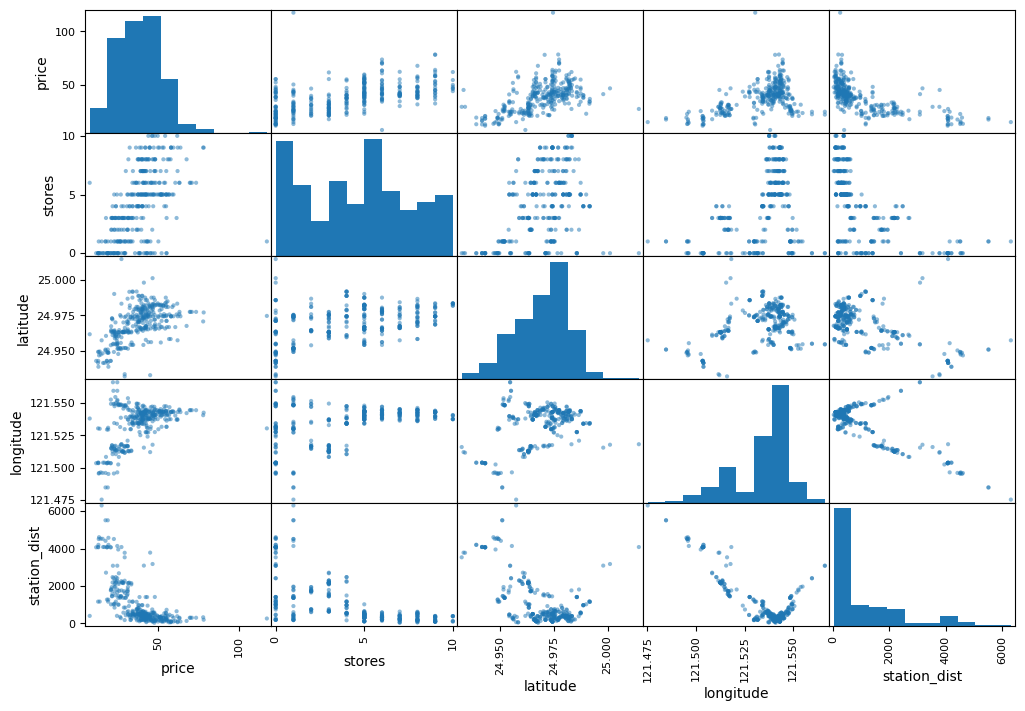

In [14]:
from pandas.plotting import scatter_matrix
attributes=['price','stores','latitude','longitude','station_dist']

scatter_matrix(housing[attributes],figsize=(12,8))

In [15]:
# housing['location']=housing['latitude']*housing['longitude']
# housing.head()

In [16]:
# corr_matrix=housing.corr()
# corr_matrix['price'].sort_values(ascending=False)

In [17]:
# housing.plot(kind='scatter',x='location',y='price',alpha=0.8)

In [18]:
housing=train_set.drop('price',axis=1)
housing_labels=train_set['price']

print(housing.head())
print(housing_labels.head())

     trans_date   age  station_dist  stores  latitude  longitude
192    2013.167  43.8      57.58945       7  24.96750  121.54069
234    2013.250   8.0    2216.61200       4  24.96007  121.51361
5      2012.667   7.1    2175.03000       3  24.96305  121.51254
45     2013.083  36.6     488.81930       8  24.97015  121.54494
245    2013.417   7.5     639.61980       5  24.97258  121.54814
192    42.7
234    23.9
5      32.1
45     38.3
245    40.8
Name: price, dtype: float64


# Missing Attributes


In [19]:
#three ways to deal with
#    1. remove data points
#    2. remove attributes
#    3. replace with some value (0,mean,median)

In [20]:
#option 1
# a=housing.dropna(subset=['no_stores'])

In [21]:
# option 2
# a=housing.drop('no_stores',axis=1)
# a

In [22]:
# option 3
# median=housing['no_stores'].median()fr
# print(median)
# a=housing['no_stores'].fillna(median)

In [23]:
# from sklearn.impute import SimpleImputer

# imputer=SimpleImputer(strategy='median')
# imputer.fit(housing)

In [24]:
# imputer.statistics_

In [25]:
# X=imputer.transform(housing)

# housing_tr= pd.DataFrame(X,columns=housing.columns)
# housing_tr.describe()

# Feature scaling

Primarily, two types of feature scalling methods

1. Min-max scalling(Normalization)
     (val-min)/(max-min)
     Sklearn provides a class called MinMaxScaler
     
2. Standardization 
     (val-mean)/std   (variance become 1 and mean remain as it as)
     Sklearn provides a class called StandardScaler

# Scikit-learn design

Primarily three typs of objects

1. Estimators - it estimates some parameters based on the dataset. Eg.      Imputer. It hasb a fit method and transform method.
         fit method - fits the dataset and calculates internal parameters
         
2. Transformers - transform method takes input and returns output based on the learning from fit(). it also has a convenience function called fir_transform() which fits and then transfroms.

3. Predictors - LinearRegression Model is an example of predictor. fir() and predict() are two common functions. it also gives score() function which evaluate the predictions.

# Creating a Pipeline

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

my_pipeline= Pipeline(
[
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler())
]
)

In [27]:
housing_num_tr=my_pipeline.fit_transform(housing)
housing_num_tr

array([[ 1.12832111e-03,  2.34401494e+00, -8.23965189e-01,
         9.68041591e-01, -1.47065968e-01,  4.55057247e-01],
       [ 2.96350853e-01, -8.21281376e-01,  9.51417705e-01,
        -4.91703665e-02, -7.43116969e-01, -1.35592638e+00],
       [-1.77732066e+00, -9.00855865e-01,  9.17224467e-01,
        -3.88241019e-01, -5.04054791e-01, -1.42748297e+00],
       ...,
       [ 5.91573384e-01, -5.73716301e-01, -6.63620966e-01,
        -1.06638232e+00,  4.22511704e-01, -2.29077262e-01],
       [-1.18687560e+00, -1.12189611e+00, -6.57800254e-01,
         6.28970939e-01,  5.22789463e-01,  7.53989921e-01],
       [-2.97651108e-01, -1.43135245e+00, -7.12135284e-01,
         6.28970939e-01, -2.90663719e-01,  4.68432311e-01]])

# Selecting a desired Model 

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# model=LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()

model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [29]:
# some_data=housing.iloc[:5]
# some_labels=housing_labels.iloc[:5]
# prepared_data=my_pipeline.transform(some_data)

In [30]:
# model.predict(prepared_data)

In [31]:
# list(some_labels)

# Evaluating the model

In [32]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels,housing_predictions)
rmse = np.sqrt(mse)

rmse

3.0481926149966387

# Cross Validation technique

In [33]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, housing_num_tr, housing_labels, scoring='neg_mean_squared_error',cv=10)
rmse_scores=np.sqrt(-scores)

rmse_scores 

array([ 7.76979513,  5.50180866,  8.45288271,  9.99842145,  6.11437535,
        8.2466294 ,  6.45048929,  6.00028677,  7.19430526, 13.7017141 ])

In [34]:
def print_scores(scores):
    print("Scores : ",scores)
    print("Mean : ",scores.mean())
    print("Standard deviation : ",scores.std())

In [35]:
print_scores(rmse_scores)

Scores :  [ 7.76979513  5.50180866  8.45288271  9.99842145  6.11437535  8.2466294
  6.45048929  6.00028677  7.19430526 13.7017141 ]
Mean :  7.943070812262715
Standard deviation :  2.315928895953931


# Saving The Model

In [36]:
from joblib import dump, load
dump(model,'RealEstatePricePredictor')

['RealEstatePricePredictor']

# Testing the Model

In [37]:
x_test = test_set.drop('price',axis=1)
y_test= test_set['price'].copy()
x_test_prepared = my_pipeline.transform(x_test)

final_prediction = model.predict(x_test_prepared)
final_mse = mean_squared_error(y_test,final_prediction)

final_rmse=np.sqrt(final_mse)

In [38]:
final_rmse

5.597978801432274